In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## EDA (Exploratory Data Analysis)

In [2]:
# Se carga los dos datasets creados

df=pd.read_csv("../Datasets/df.csv")
df_1=pd.read_parquet("../Datasets/df_1.parquet")

Dataframe df corresponde a los datos de las plaraformas de streaming.

In [15]:
 # df plataformas

df.head(3)

,id,show_id,type,title,director,cast,country,date_added,release_year,rating,listed_in,description,plataforma,duration_int,duration_type
0,as1,s1,movie,the grand seduction,don mckellar,"brendan gleeson, taylor kitsch, gordon pinsent",canada,2021-03-30,2014,r,comedy,a small fishing village must procure a local d...,amazon,113.0,min
1,as2,s2,movie,take care good night,girish joshi,"mahesh manjrekar, abhay mahajan, sachin khedekar",india,2021-03-30,2018,13+,tv shows,a metro family decides to fight a cyber crimin...,amazon,110.0,min
2,as3,s3,movie,secrets of deception,josh webber,"tom sizemore, lorenzo lamas, robert lasardo, r...",united states,2021-03-30,2017,r,horror & suspence,after a man discovers his wife is cheating on ...,amazon,74.0,min


Se crea eda_0, corresponde a las peliculas y series alojadas en la plataformas solo con las variables ["id", "type", "release_year", "listed_in", "title","plataforma"]

In [3]:
# Se crea un nuevo dataframe con las variables más representativas 

eda_0=df[["id", "type", "release_year", "listed_in", "title","plataforma"]]
eda_0.head(3)

,id,type,release_year,listed_in,title,plataforma
0,as1,movie,2014,comedy,the grand seduction,amazon
1,as2,movie,2018,tv shows,take care good night,amazon
2,as3,movie,2017,horror & suspence,secrets of deception,amazon


df_1 es el dataframe de las puntuaciones a las peliculas.

In [27]:
df_1.head(3)

,user,score,id,plataforma,year_scored
0,1,1.0,as680,amazon,2015
1,1,4.5,ns2186,netflix,2015
2,1,5.0,hs2381,hulu,2015


In [4]:
# Se evalua los: max, min y promedio del 'score'.

print (f'El score promedio = {round(df_1.score.mean(),2)}')
print (f'El score maximo ={round(df_1.score.max(),2)}')
print (f'El score minimo = {round(df_1.score.min(),2)}')

El score promedio = 3.53
El score maximo =5.0
El score minimo = 0.5


In [81]:
f'hay {len(df_1)} calificaciones (score) con un total de {df_1.user.unique().shape[0]} usuarios que calificaron las peliculas/series'

'hay 11005757 calificaciones (score) con un total de 115077 usuarios que calificaron las peliculas/series'

In [77]:
#  Se calcula Frecuencia de usuarios por score

top_score=df_1.groupby(["score"])["user"].count()
top_score=top_score.reset_index()
top_score.columns=['score','usuarios']
top_score=top_score.head(10)
top_score

,score,usuarios
0,0.5,163864
1,1.0,350273
2,1.5,167309
3,2.0,739173
4,2.5,529789
5,3.0,2228882
6,3.5,1327305
7,4.0,2965870
8,4.5,918678
9,5.0,1614614


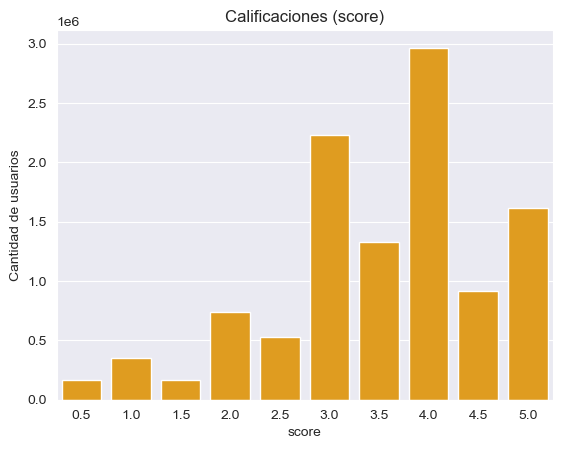

In [80]:
# Tema para los graficos
sns.set_style("darkgrid")

# gráfico de barras 
sns.barplot(y='usuarios', x='score', data=top_score, color='orange')

# títulos y etiquetas de los ejes
plt.ylabel('Cantidad de usuarios')
plt.xlabel('score')
plt.title('Calificaciones (score)')


plt.show()

In [54]:
# Usuarios que más veces han votado.

print(f'El Top 10 de usuarios que más veces han calificado peliculas es:')

top_users=df_1[['user','score']].groupby(['user']).count().sort_values( by='score',ascending=False)
top_users=top_users.reset_index()
top_users.columns=['id_user','cantidad_scores']
top_users=top_users.head(10)
top_users

El Top 10 de usuarios que más veces han calificado peliculas es:


,id_user,cantidad_scores
0,45811,17719
1,8659,9171
2,270123,7482
3,70648,5291
4,24025,4861
5,74275,4782
6,41190,4761
7,65469,4491
8,59449,4377
9,59554,4218


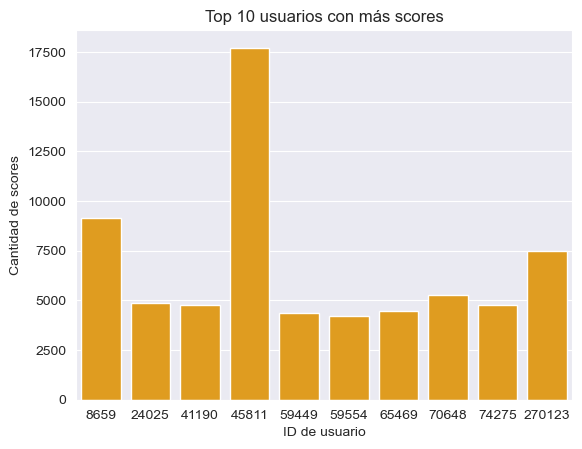

In [64]:
# gráfico de barras 
sns.barplot(y='cantidad_scores', x='id_user', data=top_users, color='orange')

# títulos y etiquetas de los ejes
plt.ylabel('Cantidad de scores')
plt.xlabel('ID de usuario')
plt.title('Top 10 usuarios con más scores')

plt.show()

In [116]:
# Peliculas más vistas

top_movie=df_1[['id','score']].groupby(['id']).count()
top_movie=top_movie.reset_index()

# Se ordena por score, se asume que una puentuacion generada es una vista.
top_movie.sort_values('score', ascending = False, inplace = True)

# join con el df que tiene los titulos por id
top_movie = pd.merge(top_movie, df[['title', 'type', 'plataforma', 'id']], on='id')

top_movie.columns=['id','veces_vistas', 'title', 'type', 'plataforma']
top_movie=top_movie.head(50)
top_movie

,id,veces_vistas,title,type,plataforma
0,as4197,574,from other worlds,movie,amazon
1,as9065,560,the organization,movie,amazon
2,ns7279,558,"leapfrog: sing-along, read-along",movie,netflix
3,as848,557,superbook,tv show,amazon
4,hs2360,555,dietland,tv show,hulu
5,as6998,554,sideways,movie,amazon
6,as4889,554,a stone in the water,movie,amazon
7,hs582,554,battle over britney: the conservatorship hearing,movie,hulu
8,as9469,553,all good things,movie,amazon
9,as2006,552,jonas kaufmann - a global star in private,movie,amazon


Se toma una muestra de 50 datos para analizar el comportamiento de las variables, los datos representan las peliculas que más se han visto. 

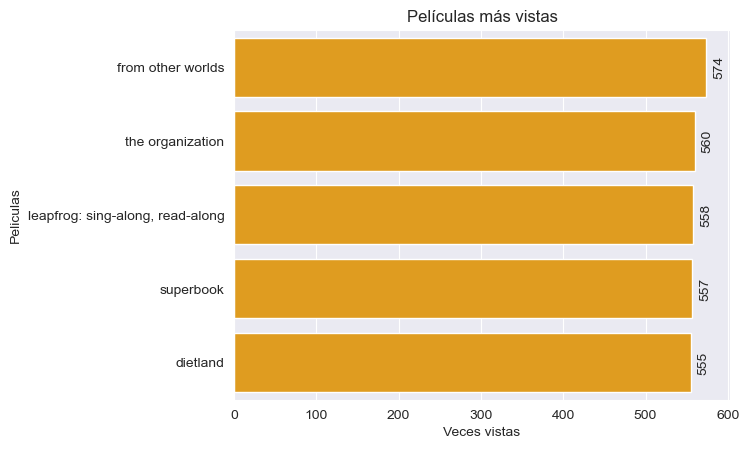

In [132]:
ax = sns.barplot(y='title', x='veces_vistas', data=top_movie.head(5), color='orange')

#  etiquetas y título
plt.xlabel('Veces vistas')
plt.ylabel('Peliculas')
plt.title('Películas más vistas')

# Poner las etiquetas de las barras en vertical
for i in ax.containers:
    ax.bar_label(i, label_type='edge',   padding=5, rotation=90)

# Mostrar el gráfico
plt.show()

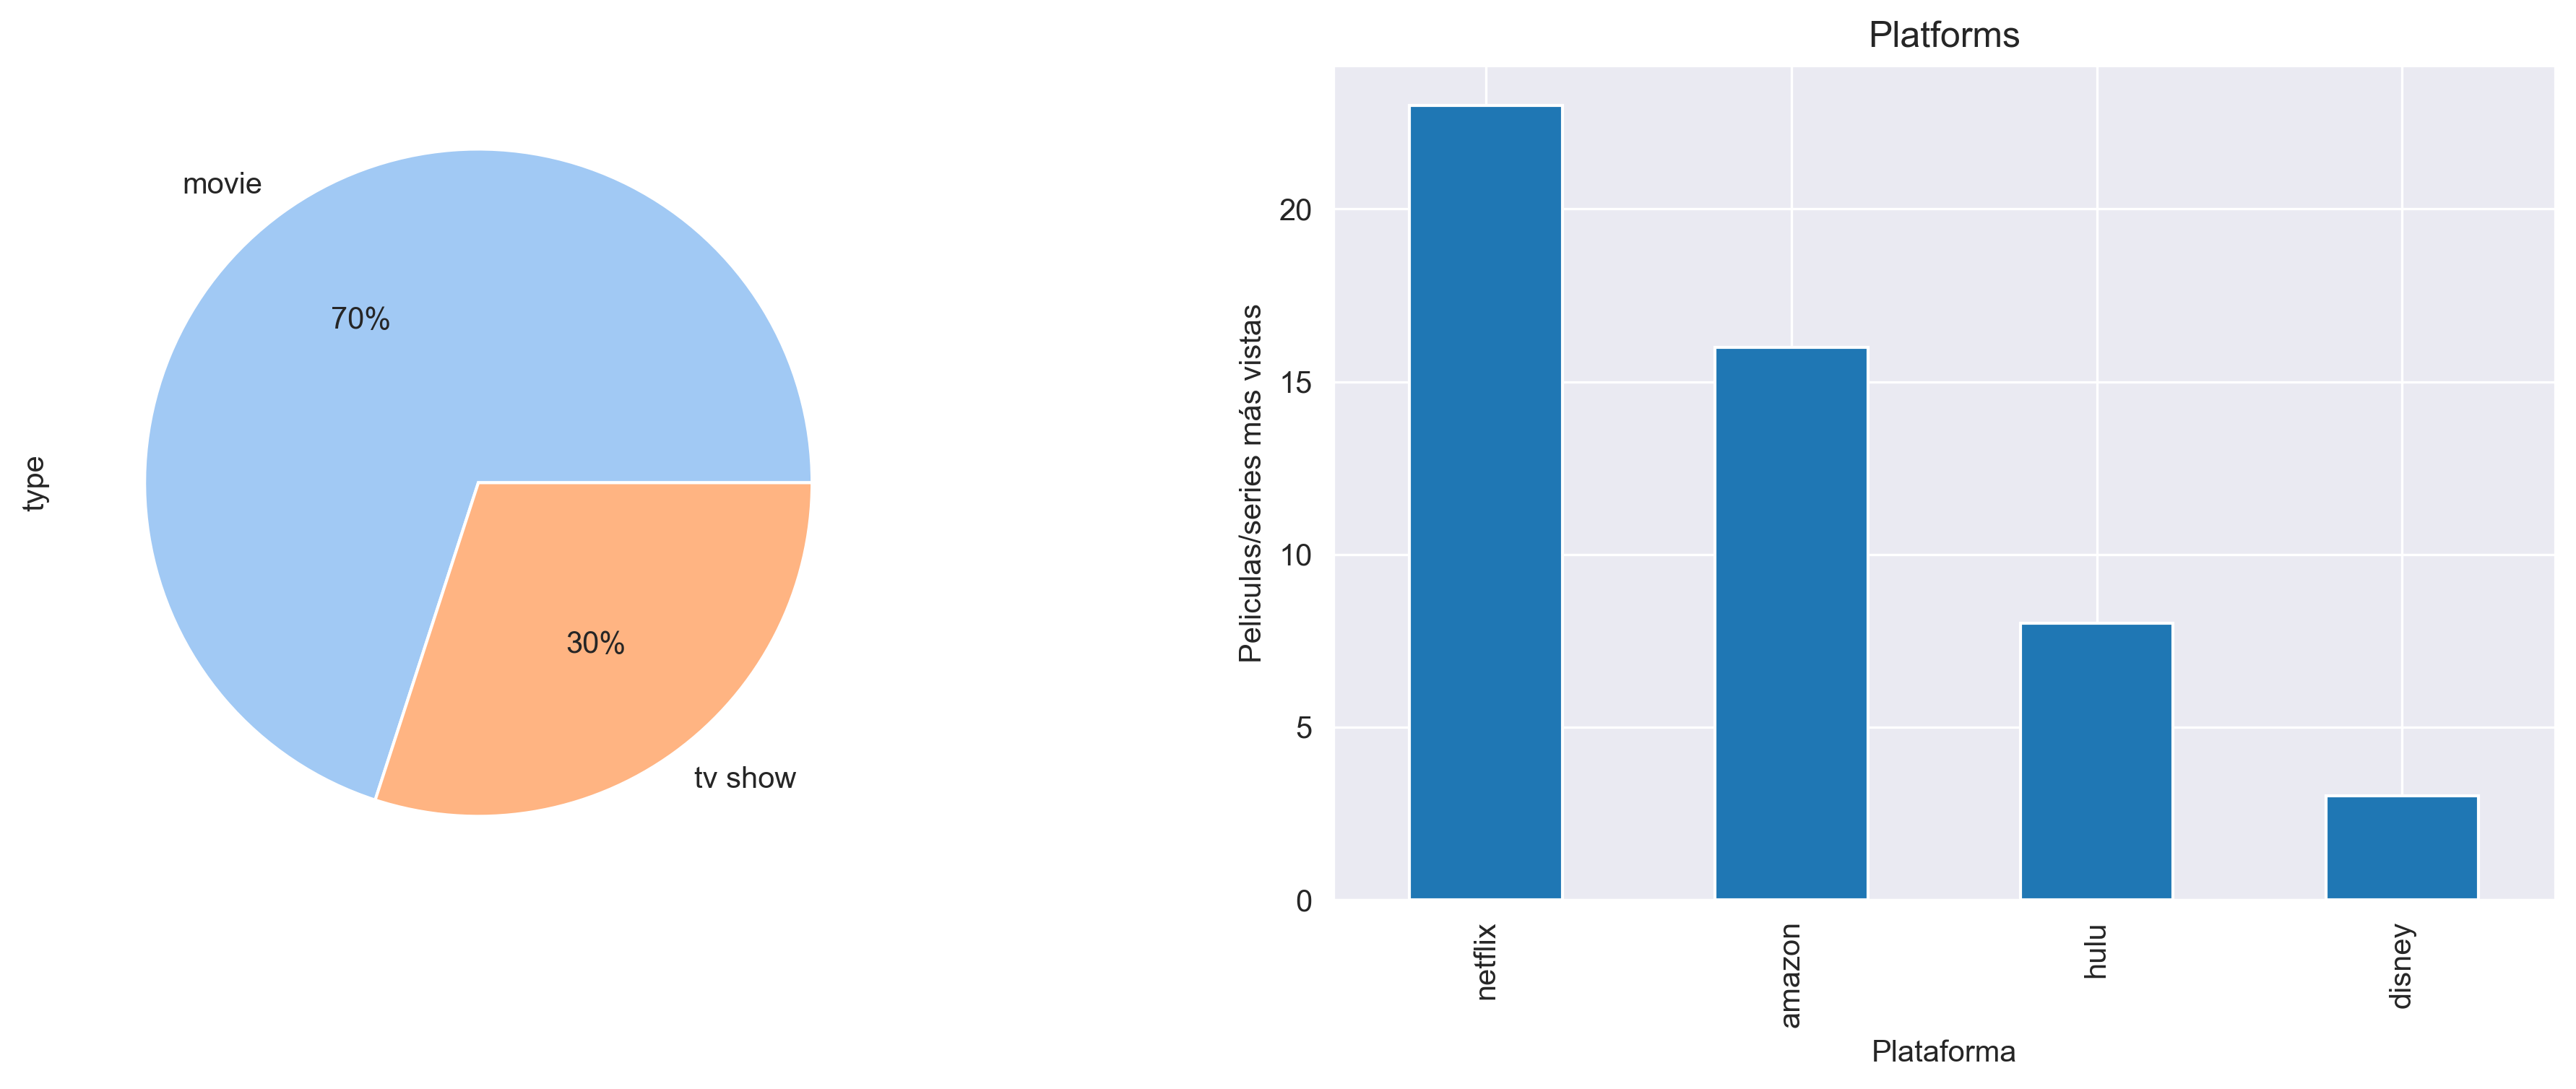

In [130]:
f, ax = plt.subplots(nrows = 1, ncols =2, figsize = (16, 5),dpi=300)

top_movie['plataforma'].value_counts().plot.bar().set(  title = "Platforms",  
xlabel="Plataforma", ylabel = "Peliculas/series más vistas")

top_movie['type'].value_counts().plot(ax=ax[0],kind='pie', colors=sns.color_palette('pastel'), autopct='%1.0f%%')

plt.show()

Se crea dataframe eda_1, correspondiente al promedio de las puntuaciones agrupadas por id de pelicula

In [24]:
#  score de Peliculas por id

eda_1=df_1.groupby(["id"])[['score']].mean()
eda_1=eda_1.reset_index()
eda_1.head(3)

,id,score
0,as1,3.467131
1,as10,3.436523
2,as100,3.610723


Se concatena los dos datasets eda_0 y eda_1 para formar un dataframe unico df_EDA. 

In [86]:
# Se realiza el join de los dos Datasets por la variable 'id'

df_EDA=pd.merge(eda_0,eda_1, on='id')

# se renombran columnas

df_EDA.columns=['id_movie','type','release_year','gender','title','platform','score']


In [87]:
df_EDA.head(5)

,id_movie,type,release_year,gender,title,platform,score
0,as1,movie,2014,comedy,the grand seduction,amazon,3.467131
1,as2,movie,2018,tv shows,take care good night,amazon,3.548682
2,as3,movie,2017,horror & suspence,secrets of deception,amazon,3.497619
3,as4,movie,2014,documentary,pink: staying true,amazon,3.536093
4,as5,movie,1989,drama,monster maker,amazon,3.478992


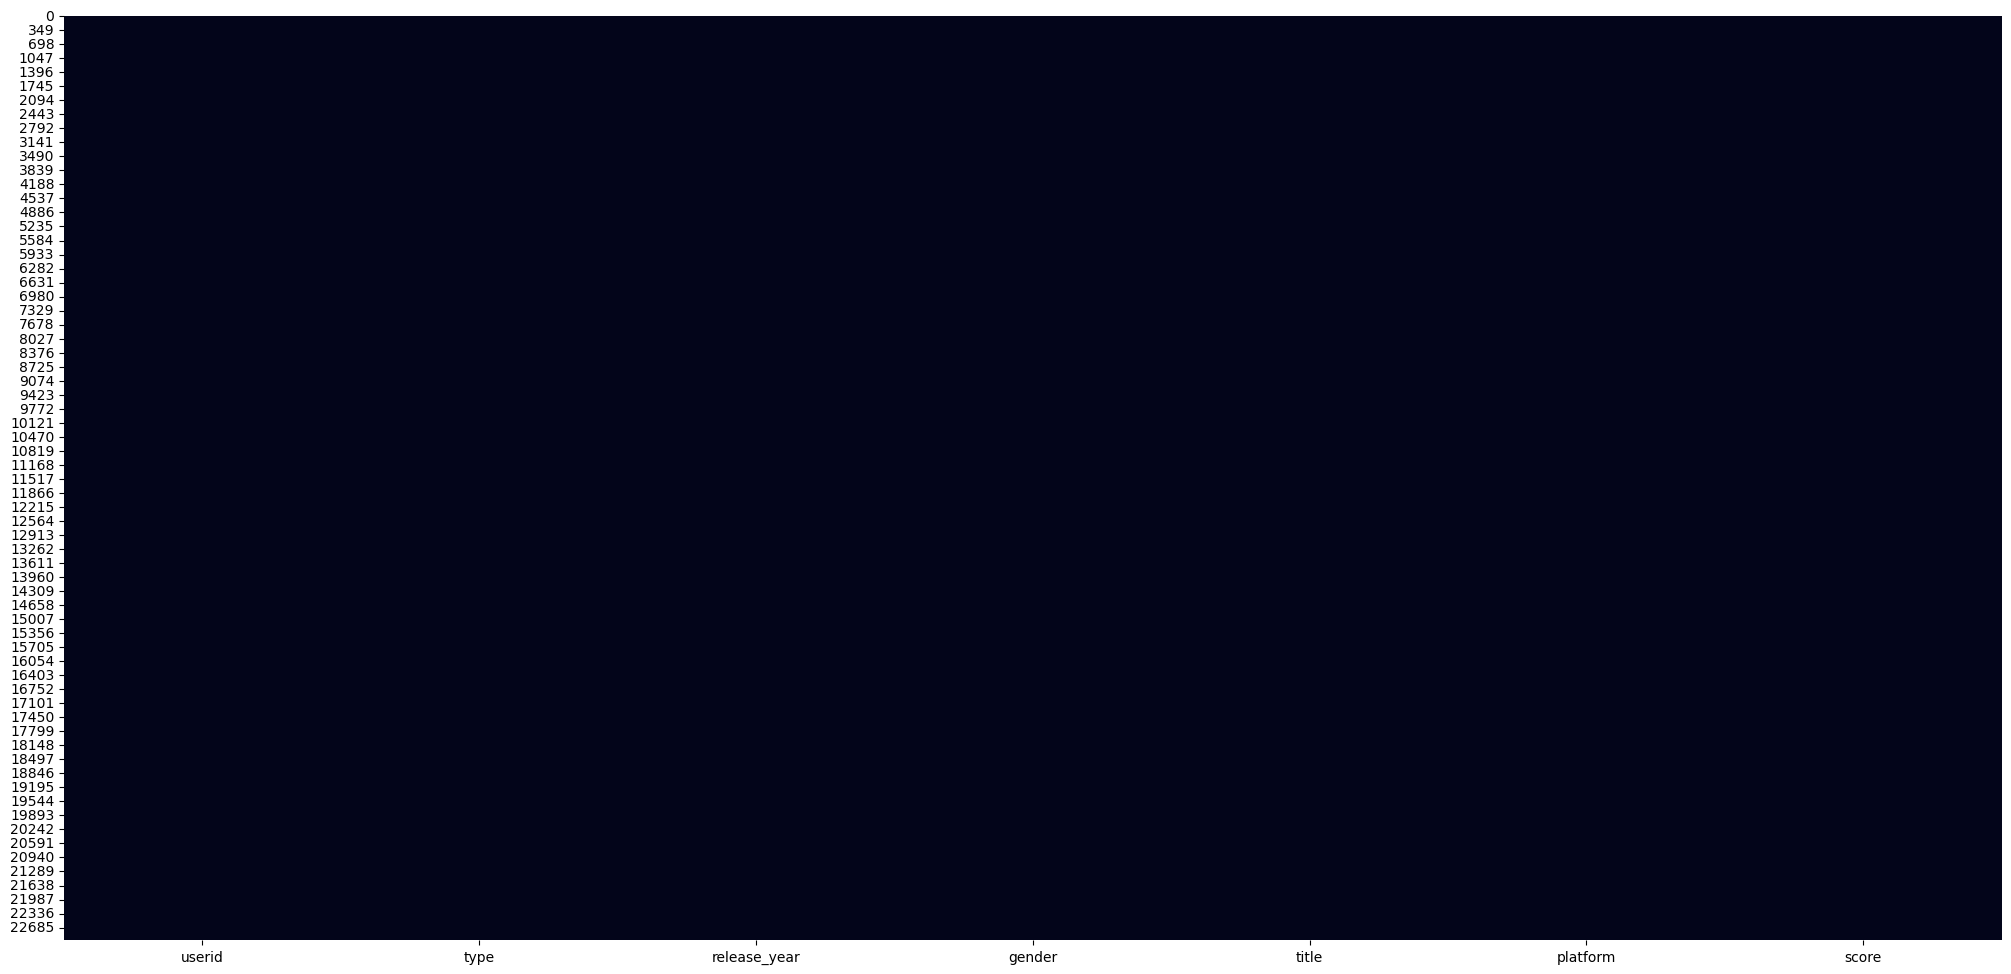

In [26]:
# Matriz para ver datos faltantes 

plt.figure(figsize= (25,12))
sns.heatmap(df_EDA.isnull(), cbar=False)
plt.show()

In [89]:
# Película con ue más calificaciones 

top_movie_EDA=df_EDA[['id_movie','score', 'title']].groupby(['id_movie']).count()
top_movie_EDA=top_movie_EDA.reset_index()
top_movie_EDA.columns=['id_movie','score','title']
top_movie_EDA=top_movie_EDA.head(10)
top_movie_EDA

,id_movie,score,title
0,as1,1,1
1,as10,1,1
2,as100,1,1
3,as1000,1,1
4,as1001,1,1
5,as1002,1,1
6,as1003,1,1
7,as1004,1,1
8,as1005,1,1
9,as1006,1,1


In [40]:
# Promedio de score por pelicula

df_EDA.groupby(["userid","plataform"])[['score']].

KeyError: 'plataform'

In [214]:
eda_1 = eda_1.reset_index()
eda_1

,id,plataforma,score
0,as1,amazon,3.467131
1,as10,amazon,3.439571
2,as100,amazon,3.609302
3,as1000,amazon,3.556701
4,as1001,amazon,3.585288
...,...,...,...
22993,ns995,netflix,3.515625
22994,ns996,netflix,3.626518
22995,ns997,netflix,3.530526
22996,ns998,netflix,3.582645


In [217]:
df_EDA.sample(7)

,id,plataforma,score,type,release_year,listed_in,title
13601,hs468,hulu,3.506098,movie,2019,tv shows,detail: daniel cormier
79,as107,amazon,3.583885,tv show,2008,tv shows,why i ran
7240,as7515,amazon,3.441860,movie,2011,horror & suspence,quarantine 2: terminal
12437,hs2186,hulu,3.559426,tv show,2019,documentary,the bomber
5956,as636,amazon,3.553145,tv show,2003,documentary,the great commanders
18993,ns5320,netflix,3.517347,movie,2017,comedy,lynne koplitz: hormonal beast
18215,ns4620,netflix,3.533199,movie,2018,action,hold the dark
